# Data types

In [1]:
import pandas as pd
dict  = { 'name': ['Daniel', 'John', 'Jane'],
         'treatment a' : ['-',12,24],
         'treatment b' : [42,31, 27]
         }

df = pd.DataFrame(dict)

In [2]:
df

,name,treatment a,treatment b
0,Daniel,-,42
1,John,12,31
2,Jane,24,27


In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
name           3 non-null object
treatment a    3 non-null object
treatment b    3 non-null int64
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


In [7]:
df

,name,treatment a,treatment b
0,Daniel,-,42
1,John,12,31
2,Jane,24,27


In [6]:
print(df.dtypes)             #### object = strings

name           object
treatment a    object
treatment b     int64
dtype: object


## converting data types ( astype( ) )

In [14]:
df['treatment b']= df['treatment b'].astype(str)
df['sex'] = df['sex'].astype('category')

In [13]:
df['sex']= ['M', 'F', 'F']
df

,name,treatment a,treatment b,sex
0,Daniel,-,42,M
1,John,12,31,F
2,Jane,24,27,F


In [15]:
df.dtypes

name             object
treatment a      object
treatment b      object
sex            category
dtype: object

## Cleaning Bad Data

In [17]:
df['treatment a'] = pd.to_numeric(df['treatment a'],
                                   errors = 'coerce')
df.dtypes

name             object
treatment a     float64
treatment b      object
sex            category
dtype: object

# Using regular expressions to clean strings


# string manipulation :

#### 're' library for regular expreessions = a formal way of specifying a pattern , sequence of charachters
#### pattern matching : similar to globe

####    17  1234567890   -  \d*  - to represent any digit, foloowed by an asterisk to match it zero or more times

####  $17  $123456789  - ( we have to escape $ sign) - \$\d*

####  $17.00  $1234567.42  - ( to match a monetary value with decimal points) =    \$\d*\.\d*

####  $ 17.89  $ 123456789.24  -= \$\d*\.\d{2}

####  $ 17.895  $ 123456789.999  - (we can take the previous pattern, and put a caret in the beginning and end  =  ^\$\d*\.\d{2}$

In [1]:
 #### to use a regular expression  to match monetary values, we compile and save the pattern with the compile function.
    
    
import re

pattern = re.compile('\$\d*\.\d{2}')

result =pattern.match('$17.89')

bool(result)

True

# String parsing with regular expressions

In [2]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}\-\d{3}\-\d{3}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))


True
False


# Extracting numerical values from strings : use re.findall( )

In [ ]:
# Say you have the following string: 'the recipe calls for 6 strawberries and 2 bananas'.

# When using a regular expression to extract multiple numbers (or multiple pattern matches, 
# to be exact), you can use the re.findall() function

In [3]:

# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


#### \d is the pattern required to find digits. This should be followed with a + so that the previous element is matched one or more times. This ensures that 10 is viewed as one number and not as 1 and 0

# Pattern matching

In [4]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}\-\d{3}\-\d{3}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='\w*', string='Australia'))
print(pattern3)

True
True
True


In [6]:
pattern4 = bool(re.match(pattern ='\d{2}\-\d{3}', string ='12-345'))
pattern4

True

# Using functions to clean data


In [11]:
import pandas as pd
import numpy as np

dict = { 'treatment a': [18,12,24],
        'treatment b' : [42,31,27]
    }
df = pd.DataFrame(dict, index=['Daniel', 'John', 'Jane'])
df

,treatment a,treatment b
Daniel,18,42
John,12,31
Jane,24,27


# Apply

In [14]:
df.apply(np.mean, axis=0)

treatment a    18.000000
treatment b    33.333333
dtype: float64

In [16]:
df.apply(np.mean, axis=1)

Daniel    30.0
John      21.5
Jane      25.5
dtype: float64

# 1) write the regular expression

In [ ]:
import re
from numpy import NaN

pattern = re.compile('^\$\d*\.\d{2}$')

# 2) writing the function

In [17]:
def diff_money(row,pattern):
    icost=row['Initial Cost']
    tef=row['Total Est. Fee']
    
    if bool(pattern.match(icost)) and bool(pattern.match(tef)):
        icost = icost.replace('$', '')
        tef = tef.replace('$','')
        
        icost = float(icost)
        tef = float(tef)
        
        return icost - tef
    else:
        return(NaN)

In [ ]:
df_subset['diff']=df_subset.apply(diff_money,
                                   axis = 1,
                                   pattern=pattern)


In [ ]:
print(df_subset.head())

# Custom functions to clean data

In [18]:
tips =pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Male':
        return 1
    
    # Return 1 if gender is 'Male'    
    elif gender == 'Female':
        return 0
    # Return np.nan    
    else:
        return (np.nan)

# Apply the function to the sex column
tips['recode'] = tips.sex.apply(recode_gender)
tips.head(3)
# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size  recode
0       16.99  1.01  Female     No  Sun  Dinner     2       0
1       10.34  1.66    Male     No  Sun  Dinner     3       1
2       21.01  3.50    Male     No  Sun  Dinner     3       1
3       23.68  3.31    Male     No  Sun  Dinner     2       1
4       24.59  3.61  Female     No  Sun  Dinner     4       0


# Duplicate and missing data


In [2]:
import pandas as pd
dict3  = { 'name': ['Daniel', 'John', 'Jane','Daniel'],
         'treatment a' : ['-',12,24,'-'],
         'treatment b' : [42,31, 27,42]
         }

df3 = pd.DataFrame(dict3)

In [3]:
df3

,name,treatment a,treatment b
0,Daniel,-,42
1,John,12,31
2,Jane,24,27
3,Daniel,-,42


In [4]:
df3 = df3.drop_duplicates()
df3

,name,treatment a,treatment b
0,Daniel,-,42
1,John,12,31
2,Jane,24,27


In [8]:
data = pd.read_csv('female_literacy_fertility.csv')
data.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,NaN,1.324655e+09
1,Chine,ASI,50.8,2.682,NaN
2,USA,NaN,99.0,2.077,3.040600e+08
3,Indonésie,ASI,88.8,2.132,2.273451e+08
4,Brésil,LAT,90.2,1.827,NaN


# Missing data

### Leave as - is
### Drop them
### Fill missing value

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            162 non-null object
Continent          159 non-null object
female literacy    162 non-null float64
fertility          161 non-null object
population         156 non-null float64
dtypes: float64(2), object(3)
memory usage: 6.4+ KB


## Drop the values with .dropna( )

In [12]:
data_dropped = data.dropna()

data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 3 to 160
Data columns (total 5 columns):
Country            152 non-null object
Continent          152 non-null object
female literacy    152 non-null float64
fertility          152 non-null object
population         152 non-null float64
dtypes: float64(2), object(3)
memory usage: 7.1+ KB


In [13]:
data_dropped.head()

,Country,Continent,female literacy,fertility,population
3,Indonésie,ASI,88.8,2.132,227345082.0
5,Pakistan,ASI,40.0,3.872,166111487.0
7,Nigéria,AF,48.8,5.173,151212254.0
8,Fédération de Russie,EUR,99.4,1.393,141950000.0
9,Japan,ASI,99.0,1.262,127704000.0


In [14]:
data_dropped.tail()

,Country,Continent,female literacy,fertility,population
156,Maldives,ASI,98.4,2,305027.0
157,Vanuatu,OCE,79.5,3.883,233866.0
158,Samoa,OCE,98.5,3.852,178869.0
159,Sao Tomé-et-Principe,AF,83.3,3.718,160174.0
160,Aruba,LAT,98.0,1.732,105455.0


## Fill the values with .fiilna( )

In [32]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,NaN,No,Sun,Dinner,NaN
1,10.34,NaN,Male,No,Sun,Dinner,3.0
2,21.01,3.50,NaN,No,Sun,Dinner,NaN
3,23.68,NaN,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [33]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           242 non-null float64
sex           242 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          242 non-null float64
dtypes: float64(3), object(4)
memory usage: 13.4+ KB


In [34]:
tips['sex'] = tips['sex'].fillna('missing')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,missing,No,Sun,Dinner,NaN
1,10.34,NaN,Male,No,Sun,Dinner,3.0
2,21.01,3.50,missing,No,Sun,Dinner,NaN
3,23.68,NaN,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [35]:
tips[['total_bill','size']]=tips[['total_bill','size']].fillna(0)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,missing,No,Sun,Dinner,0.0
1,10.34,NaN,Male,No,Sun,Dinner,3.0
2,21.01,3.50,missing,No,Sun,Dinner,0.0
3,23.68,NaN,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [36]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           242 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null float64
dtypes: float64(3), object(4)
memory usage: 13.4+ KB


## Fill missing values with a test statistics

In [37]:
mean_value = tips['tip'].mean()
mean_value

3.0025206611570243

In [38]:
tips.tip = tips.tip.fillna(mean_value)

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.010000,missing,No,Sun,Dinner,0.0
1,10.34,3.002521,Male,No,Sun,Dinner,3.0
2,21.01,3.500000,missing,No,Sun,Dinner,0.0
3,23.68,3.002521,Male,No,Sun,Dinner,2.0
4,24.59,3.610000,Female,No,Sun,Dinner,4.0


In [40]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null float64
dtypes: float64(3), object(4)
memory usage: 13.4+ KB


In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.010000,missing,No,Sun,Dinner,0.0
1,10.34,3.002521,Male,No,Sun,Dinner,3.0
2,21.01,3.500000,missing,No,Sun,Dinner,0.0
3,23.68,3.002521,Male,No,Sun,Dinner,2.0
4,24.59,3.610000,Female,No,Sun,Dinner,4.0


# Filling missing data

In [ ]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

# Print the info of airquality
print(airquality.info())
airquality.head()

# Testing your data with asserts

##### In the video, you saw Dan use the .all() method together with the .notnull() DataFrame method to check for missing values in a column. The .all() method returns True if all values are True

#### We can write an assert statement to verify that we dont have missing values 


# Asserts

In [43]:
assert 1==1

In [44]:
assert 1==2

AssertionError: 

In [60]:
dict7 = {'Date' : ['2017-02-09','2017-02-08','2017-02-07'],
         'Open' : [831.523698, 845.78121235, float('NaN')],
         'Close': [830.059998, 829.880005, float('NaN')],
         'Adj Close': [float('NaN'), 829.8800005, float('NaN')]
    
}

df7 =pd.DataFrame(dict7)

In [61]:
df7

,Date,Open,Close,Adj Close
0,2017-02-09,831.523698,830.059998,NaN
1,2017-02-08,845.781212,829.880005,829.880001
2,2017-02-07,NaN,NaN,NaN


## using notnull( ).all( )

In [62]:
df7.Close

0    830.059998
1    829.880005
2           NaN
Name: Close, dtype: float64

In [64]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
Date         3 non-null object
Open         2 non-null float64
Close        2 non-null float64
Adj Close    1 non-null float64
dtypes: float64(3), object(1)
memory usage: 176.0+ bytes


In [65]:
assert df7.Close.notnull().all()

AssertionError: 

## we can fill with 0 using  .fillna(0)

In [67]:
df7_0 =df7.fillna(0)
df7_0

,Date,Open,Close,Adj Close
0,2017-02-09,831.523698,830.059998,0.000000
1,2017-02-08,845.781212,829.880005,829.880001
2,2017-02-07,0.000000,0.000000,0.000000


In [79]:
assert df7_0.Close.notnull().all().all()

# Note: You can use pd.notnull(df) as an alternative to df.notnull().

###### Use the pd.notnull() function on ebola (or the .notnull() method of ebola) and chain two .all() methods (that is, .all().all()). The first .all() method will return a True or False for each column, while the second .all() method will return a single True or False.

######    Write an assert statement to confirm that all values in ebola are greater than or equal to 0. Chain two all() methods to the Boolean condition (ebola >= 0).

In [ ]:
# Assert that there are no missing values
assert pd.notnull(ebola).all().all()

# Assert that all values are >= 0
assert (ebola >= 0).all().all()


In [71]:
df8 = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/ebola.csv')
df8.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [73]:
assert df8.notnull().all().all()

AssertionError: 

In [76]:
df8_0= df8.fillna(1)
df8_0.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,1.0,10030.0,1.0,1.0,1.0,1.0,1.0,1786.0,1.0,2977.0,1.0,1.0,1.0,1.0,1.0
1,1/4/2015,288,2775.0,1.0,9780.0,1.0,1.0,1.0,1.0,1.0,1781.0,1.0,2943.0,1.0,1.0,1.0,1.0,1.0
2,1/3/2015,287,2769.0,8166.0,9722.0,1.0,1.0,1.0,1.0,1.0,1767.0,3496.0,2915.0,1.0,1.0,1.0,1.0,1.0
3,1/2/2015,286,1.0,8157.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3496.0,1.0,1.0,1.0,1.0,1.0,1.0
4,12/31/2014,284,2730.0,8115.0,9633.0,1.0,1.0,1.0,1.0,1.0,1739.0,3471.0,2827.0,1.0,1.0,1.0,1.0,1.0


In [77]:
pd.notnull(df8_0).all().all()

True

In [83]:
df8_0.Day.nunique()

122

# Putting it all together

## df.head()
## df.info()
## df.columns
##  df.describe()

## df.describe()

## df.column.value_counts()


In [84]:
    import pandas as pd
    import numpy as np

# create histogram

### df.column.plot('hist')

In [ ]:
def cleaning_function(row_data):
    return ....

In [ ]:
df.apply(cleaning_function, axis=1)

In [ ]:
assert (df.column_data>0).all()

# Combining data

## pd.merge(df1,df2)

## pd.concat([df1, df2])



In [91]:
gs= pd.read_csv('https://github.com/wblakecannon/DataCamp/blob/master/10-cleaning-data-in-python/_datasets/g1800s.csv', sep='\t')
gs.head()

,<!DOCTYPE html>
0,"<html lang=""en"">"
1,<head>
2,"<meta charset=""utf-8"">"
3,"<link rel=""dns-prefetch"" href=""https://githu..."
4,"<link rel=""dns-prefetch"" href=""https://avata..."


In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
gs.plot(kind='scatter', x='1801', y='1899')
gs.head()
# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()


# Thinking about the question at hand

In [ ]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0
g1800s.head(3)
# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


# Initial impressions of the data


# Principles of tidy data



###   Rows form observations
### ● Columns form variables
### ● Tidying data will make data cleaning easier
### ● Melting turns columns into rows
### ● Pivot will take unique values from a column and create new columns

# Checking data types

In [ ]:
df.dtypes

df['column']= df['column'].to_numeric()
df['column'] = df['column'].astype(str)

# Additional calculations and saving your data


In [ ]:
df['new_column'] = df['column_1'] + df['column_2']

df['new_column'] = df.apply(my_function, axis=1)

df.to_csv['my_data.csv']      #### write csv file and save it

In [105]:
gapminder = pd.read_csv('https://assets.datacamp.com/production/course_2023/datasets/gapminder.csv', index_col=0)
gapminder.head()
                       

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


# Reshaping your data

In [106]:
import pandas as pd
import numpy as np

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame=gapminder, id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


# Checking the data types

In [107]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


In [108]:
gapminder_melt.dtypes

country             object
year                object
life_expectancy    float64
dtype: object

In [110]:
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year, errors = 'coerce')

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64


In [111]:
gapminder_melt.head(3)

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN


In [112]:
gapminder_melt.dtypes

country             object
year                 int64
life_expectancy    float64
dtype: object

In [ ]:
gapminder_melt.year = pd.to_numeric(gapminder_melt.year,errors = 'coerce')

assert gapminder_melt.year.dtypes==np.int64


# Looking at country spellings



####    Pandas has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.

#####   Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. This Boolean series can then be used to get the Series of countries that have invalid names.

In [121]:
countries =gapminder_melt.country
countries.head()


0                 Abkhazia
1              Afghanistan
2    Akrotiri and Dhekelia
3                  Albania
4                  Algeria
Name: country, dtype: object

In [122]:
gapminder_melt[gapminder_melt.country=='Albania'].head()

,country,year,life_expectancy
3,Albania,1800,35.4
263,Albania,1800,NaN
523,Albania,1800,NaN
783,Albania,1801,35.4
1043,Albania,1801,NaN


In [124]:
len(countries)

169260

In [126]:
countries = countries.drop_duplicates()

In [127]:
len(countries)

260

In [128]:
countries.nunique()

260

In [129]:
countries.head()

0                 Abkhazia
1              Afghanistan
2    Akrotiri and Dhekelia
3                  Albania
4                  Algeria
Name: country, dtype: object

####  1)Use A-Za-z to match the set of lower and upper case letters, \. to match periods, and \s to match whitespace between words.

In [131]:
# Write the regular expression: pattern
pattern = '^[A-Za-za\.\s]*$'


In [136]:
countries.tail(14)

246                Venezuela
247       West Bank and Gaza
248             West Germany
249           Western Sahara
250                  Vietnam
251    Virgin Islands (U.S.)
252     North Yemen (former)
253     South Yemen (former)
254                    Yemen
255               Yugoslavia
256                   Zambia
257                 Zimbabwe
258                    Åland
259              South Sudan
Name: country, dtype: object

#### 2) Use str.contains() to create a Boolean vector representing values that match the pattern

In [137]:
# Create the Boolean vector: mask
mask = countries.str.contains(pattern)
mask.tail()

255     True
256     True
257     True
258    False
259     True
Name: country, dtype: bool

In [139]:
# Invert the mask: mask_inverse
mask_inverse = ~countries.str.contains(pattern)
mask_inverse.tail()

255    False
256    False
257    False
258     True
259    False
Name: country, dtype: bool

In [140]:
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]
invalid_countries

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object

# More data cleaning and processing

In [143]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()
gapminder.head()
# Drop the missing values
gapminder_melt = gapminder_melt.dropna()

# Print the shape of gapminder
print(gapminder_melt.shape)


(43857, 3)


# Wrapping up

In [145]:
import matplotlib.pyplot as plt

gapminder_melt.head()


,country,year,life_expectancy
1,Afghanistan,1800,28.21
3,Albania,1800,35.40
4,Algeria,1800,28.82
7,Angola,1800,26.98
9,Antigua and Barbuda,1800,33.54


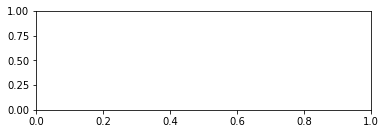

In [147]:
# Add first subplot
plt.subplot(2, 1, 1) 

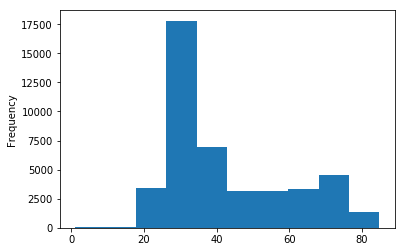

In [148]:
gapminder.life_expectancy.plot(kind='hist')

In [151]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()
gapminder_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

In [153]:
gapminder_agg1= gapminder_melt.groupby('country')['life_expectancy'].mean()
gapminder_agg1.head()

country
Afghanistan       32.095161
Albania           46.694240
Algeria           39.037051
American Samoa    71.655556
Andorra           83.737037
Name: life_expectancy, dtype: float64

In [154]:
# Print the tail of gapminder_agg
print(gapminder_agg.tail())

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


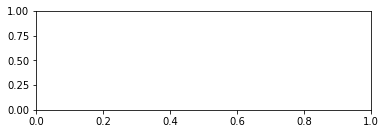

In [155]:
# Add second subplot
plt.subplot(2, 1, 2)

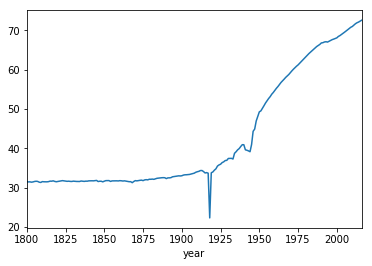

In [156]:
# Create a line plot of life expectancy per year
gapminder_agg.plot()

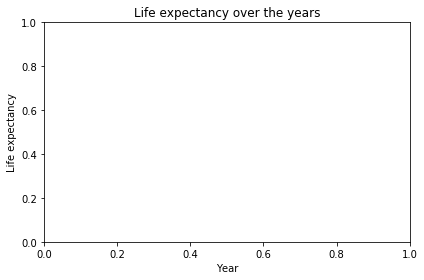

In [157]:
# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()


# Save DataFrames

In [160]:
# Save both DataFrames to csv files
gapminder_melt.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')


C:\Users\Bota\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


# PLotting

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


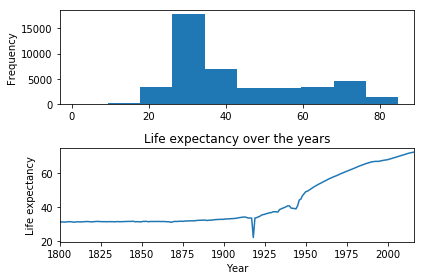

C:\Users\Bota\Miniconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [161]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder_melt.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')
